In [63]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import cv2
import numpy as np
from skimage.color import rgb2gray

In [64]:
def imagen(dir_imagen):
  img = mpimg.imread(dir_imagen)
  plt.figure()
  img = 255*rgb2gray(img)
  
  return img

In [65]:
def th_sauvola(I,k, R, w):

  rowsImg = I.shape[0]
  colsImg = I.shape[1]

  rowsKernel=w[0]
  colsKernel=w[1]
  rowsPadding = int((rowsKernel-1)/2)
  colsPadding = int((colsKernel-1)/2)

  imgPadded = np.zeros((rowsImg+ 2*rowsPadding, colsImg + 2*colsPadding))
  imgPadded[rowsPadding: rowsImg +rowsPadding, colsPadding: colsImg+colsPadding]=I

  rowsImgOut = int(rowsImg - rowsKernel + 2* rowsPadding +1)
  colsImgOut = int(colsImg - colsKernel + 2* colsPadding +1)
  imgOut = np.zeros((rowsImgOut, colsImgOut))

  for i in range(rowsImgOut):
    for j in range(colsImgOut):
      imgPatch=imgPadded[i:i+rowsKernel, j:j+colsKernel]
      m=np.mean(imgPatch)
      s=np.std(imgPatch)
      imgOut[i,j]=m*(1+k*((s/R) - 1))
  
  binaryImg = I > imgOut
  return binaryImg

In [66]:
def th_bernsen(I,w,c, Th):

  rowsImg = I.shape[0]
  colsImg = I.shape[1]

  rowsKernel=w[0]
  colsKernel=w[1]
  rowsPadding = int((rowsKernel-1)/2)
  colsPadding = int((colsKernel-1)/2)

  imgPadded = np.zeros((rowsImg+ 2*rowsPadding, colsImg + 2*colsPadding))
  imgPadded[rowsPadding: rowsImg +rowsPadding, colsPadding: colsImg+colsPadding]=I

  rowsImgOut = int(rowsImg - rowsKernel + 2* rowsPadding +1)
  colsImgOut = int(colsImg - colsKernel + 2* colsPadding +1)
  imgOut = np.zeros((rowsImgOut, colsImgOut))

  for i in range(rowsImgOut):
    for j in range(colsImgOut):
      imgPatch=imgPadded[i:i+rowsKernel, j:j+colsKernel]
      mx=imgPatch.max()
      mn=imgPatch.min()
      T = (mx+mn)/2
      if(mx-mn) <= c:
        imgOut[i,j]=Th
      else:
        imgOut[i,j]=T

  binaryImg = I > imgOut
  return (binaryImg, imgOut)

Image size:  862650


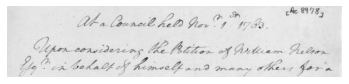

In [67]:
dir_img = r'/content/sample_data/H01.bmp' #Para correr de manera local, modificar esta linea; ya que esta direccion de la imagen es dada por Google Colab
I = imagen(dir_img)
plt.imshow(I, cmap = 'gray') 
plt.axis('off')
print("Image size: ", I.size)

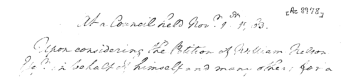

Image size:  862650


In [68]:
k = 0.2
R=128
w= [11,11]
output=th_sauvola(I,k,R,w)
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()
print("Image size: ", I.size) 

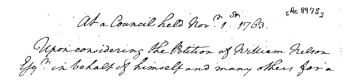

Image size:  862650
Valor de Umbral Optimo:  [[90.  90.  90.5 ... 93.  93.  93. ]
 [90.  90.  90.5 ... 93.  93.  93. ]
 [90.  90.  90.5 ... 93.  93.  93. ]
 ...
 [93.  93.  93.5 ... 95.  95.  95. ]
 [93.  93.  93.5 ... 95.  95.  95. ]
 [93.  93.  93.5 ... 95.  95.  95. ]]


In [69]:
C = 30
Th=128
w= [11,11]
(output,T) = th_bernsen(I,w, C, Th)
plt.imshow(output, cmap='gray')
plt.axis('off')
plt.show()
print("Image size: ", I.size)
print("Valor de Umbral Optimo: ",T) 